<a href="https://colab.research.google.com/github/LAHROURI/Load_breast_cancer/blob/main/Load_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset load_breast_cancer()

La classification des tumeurs du sein à l'aide de différentes méthodes de Machine Learning.
L'objectif est de prédire si une tumeur est bénigne ou maligne en utilisant l'ensemble de données `load_breast_cancer()` de scikit-learn.


**L'imporation des bibliothèques**

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import time
from sklearn.model_selection import GridSearchCV

1. chargement les données
2. création du DataFrame
3. L'ajout de la colonne cible

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

un résumé (`df.info()`) pour connaître les types de données et l'absence de valeurs manquantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Prétraitement

Remplir les valeurs manquants par la moyenne parce que touts les enregistrements sont des valeurs numériques

In [ ]:
#remplir les valeurs manquants
df.fillna(df.mean(), inplace=True)

Séparation X et y

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

Encodage de la cible

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

Mise à l'échelle des caractéristiques

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Division des données.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Traitement

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation - Random Forest

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.9649122807017544


Model Prediction - Random Forest

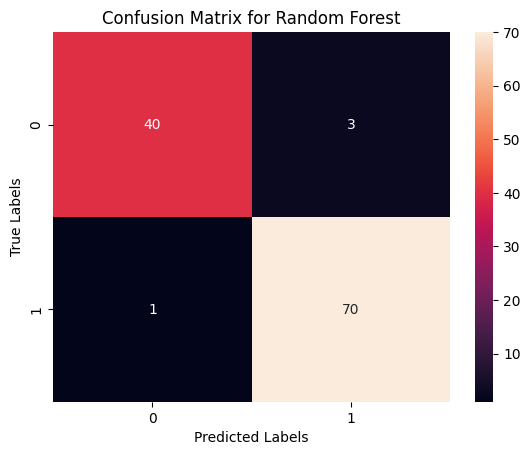

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Classification report - Random Forest

In [ ]:
classification_reports = {}
classification_reports['Random Forest'] = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**Naïve Bayes**

Model Evaluation - Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naïve Bayes Accuracy:", accuracy)

Naïve Bayes Accuracy: 0.9649122807017544


Model prediction - Naïve Bayes

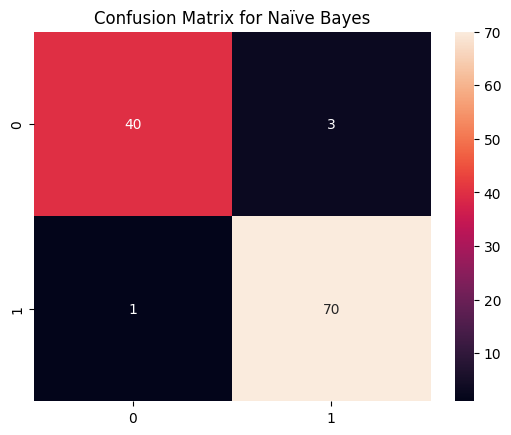

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix for Naïve Bayes")
plt.show()

Classification report - Random Forest

In [ ]:
classification_reports['Random Forest'] = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



**SVM Classifier**

Model Evaluation - SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.956140350877193


The Confusion Matrix Visualization for SVM

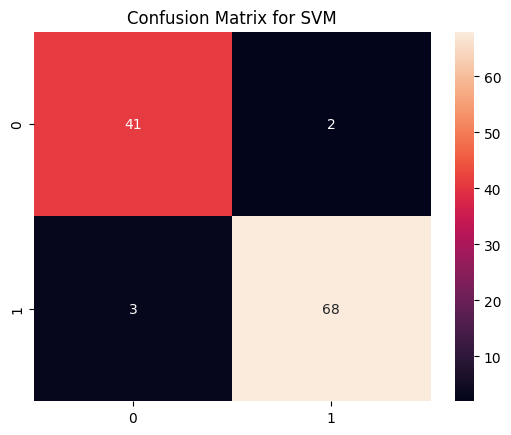

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix for SVM")
plt.show()

Classification report - SVM

In [ ]:
classification_reports['SVM'] = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



**AdaBoost Classifier**

Model Evaluation - AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Accuracy:", accuracy)

AdaBoost Accuracy: 0.9736842105263158


The Confusion Matrix Visualization for AdaBoost

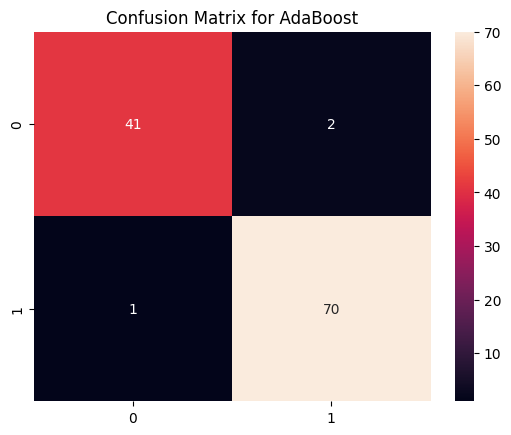

In [ ]:
cmd = confusion_matrix(y_test, y_pred)
sns.heatmap(cmd, annot=True, fmt='d')
plt.title("Confusion Matrix for AdaBoost")
plt.show()

The classification report

In [ ]:
classification_reports['AdaBoost'] = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**Dession Tree**

Model Evaluation - Dession Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.9385964912280702


Confusion Matrix Visualization

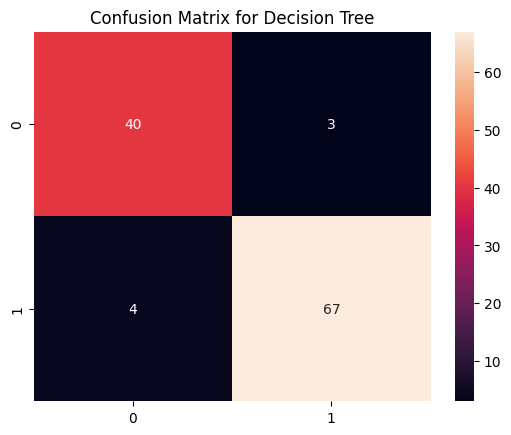

In [ ]:
cmd = confusion_matrix(y_test, y_pred)
sns.heatmap(cmd, annot=True, fmt='d')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

Classification reports

In [ ]:
classification_reports['Decision Tree'] = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



**Regression logistic**

Model Evaluation - regression logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.9736842105263158


Confusion Matrix Visualization

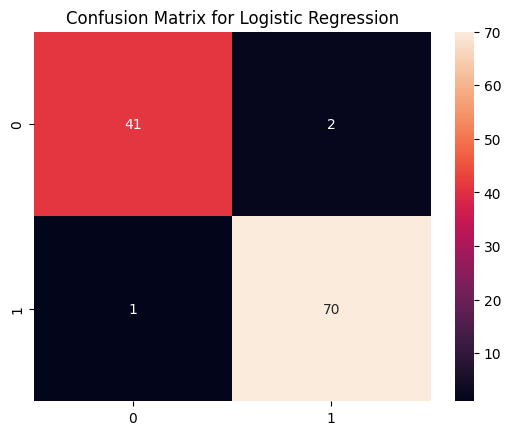

In [ ]:
cmd = confusion_matrix(y_test, y_pred)
sns.heatmap(cmd, annot=True, fmt='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Classification report

In [ ]:
classification_reports['Logistic Regression'] = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



**KNN**

Model Evaluation - KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.9473684210526315


Confusion Matrix Visualization

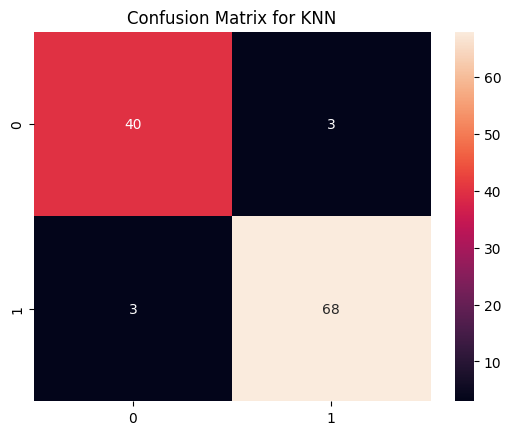

In [ ]:
cmd = confusion_matrix(y_test, y_pred)
sns.heatmap(cmd, annot=True, fmt='d')
plt.title("Confusion Matrix for KNN")
plt.show()

Classification report

In [ ]:
classification_reports['KNN'] = classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Comparaison des Classification Reports**

In [ ]:
# Afficher tous les classification reports stockés
print("=================================================")
print("             Comparison of Classification Reports")
print("=================================================")

for algo_name, report in classification_reports.items():
    print(f"\n--- {algo_name} ---")
    print(report)

print("=================================================")

             Comparison of Classification Reports

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


--- SVM ---
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114


--- AdaBoost ---
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97 

# Traitement avec GridSearchCV

Définir les classificateurs avec les paramètres de chaque modèles utilisé dans le traitement

In [ ]:
# Définir les classificateurs et leurs grilles de paramètres respectives
classifiers = [
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'Naïve Bayes',
        'estimator': GaussianNB(),
        'param_grid': {
            # GaussianNB n'a généralement pas beaucoup de paramètres à régler,
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    {
        'name': 'SVM Classifier',
        'estimator': SVC(kernel='linear', probability=True, random_state=42), # probability=True pour roc_auc
        'param_grid': {
            'C': [0.1, 1, 10]
        }
    },
    {
        'name': 'AdaBoost Classifier',
        'estimator': AdaBoostClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
     {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(random_state=42, solver='liblinear'), # Utiliser un solver approprié
        'param_grid': {
            'C': [0.01, 0.1, 1, 10],
             'penalty': ['l1', 'l2'] # l1 et l2 sont courants pour liblinear
        }
    },
     {
        'name': 'KNN',
        'estimator': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    }
]

**Le score AUC** : "Area Under the Curve", ou "Aire sous la courbe". Il est utilisé pour évaluer les performances d’un modèle de classification binaire, en particulier à partir de la courbe ROC (Receiver Operating Characteristic).

**Courbe ROC** : C’est une courbe qui trace le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité).

Elle montre comment le modèle se comporte à différents seuils de décision.

**Score AUC (ROC AUC Score)** :
Le score AUC correspond à l’aire sous cette courbe.
Il varie entre 0 et 1 :

*   1.0 : modèle parfait.
*   0.5 : modèle aléatoire (pas mieux qu’un pile ou face).
*   < 0.5 : modèle inverse (pire qu’aléatoire).

Plus le score est proche de 1, meilleur est le modèle pour séparer les deux classes (positif et négatif).

C’est un indicateur robuste, car il prend en compte toutes les valeurs possibles du seuil de décision, pas seulement une valeur fixe.

In [ ]:
# Dictionnaires pour stocker les meilleurs résultats
best_estimators = {}
best_params = {}
accuracies = {}
classification_reports = {}
confusion_matrices = {}
roc_auc_scores = {} # Pour stocker les scores AUC

In [ ]:
# Boucler sur chaque classificateur pour faire la recherche de grille
print("Starting GridSearchCV for all classifiers...")
for classifier_info in classifiers:
    name = classifier_info['name']
    estimator = classifier_info['estimator']
    param_grid = classifier_info['param_grid']

    print(f"\n--- Running GridSearchCV for {name} ---")

    start_time = time.time()

    grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Exécuter la recherche de grille sur les données d'entraînement
    grid_search.fit(X_train, y_train)

    end_time = time.time()
    print(f"GridSearchCV for {name} finished in {end_time - start_time:.2f} seconds.")

    # Meilleurs paramètres et meilleur score
    best_params[name] = grid_search.best_params_
    best_estimators[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}")

    # Évaluer le meilleur estimateur sur l'ensemble de test
    y_pred = best_estimators[name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Test Accuracy: {accuracy:.4f}")

    # Générer et stocker le classification report
    classification_reports[name] = classification_report(y_test, y_pred)

    # Générer et stocker la matrice de confusion
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    # Calculer et stocker le score ROC AUC si le modèle le permet (nécessite predict_proba ou decision_function)
    try:
        if hasattr(best_estimators[name], "predict_proba"):
            y_probs = best_estimators[name].predict_proba(X_test)[:, 1]
        elif hasattr(best_estimators[name], "decision_function"):
             # SVM avec kernel='linear' a decision_function, pas predict_proba par défaut
             y_probs = best_estimators[name].decision_function(X_test)
        else:
            y_probs = None # Modèle ne supporte pas predict_proba/decision_function pour AUC

        if y_probs is not None:
             roc_auc = roc_auc_score(y_test, y_probs)
             roc_auc_scores[name] = roc_auc
             print(f"{name} ROC AUC Score: {roc_auc:.4f}")
        else:
             print(f"{name} does not support ROC AUC calculation.")

    except Exception as e:
        print(f"Could not calculate ROC AUC for {name}: {e}")
        roc_auc_scores[name] = None # Indiquer que le calcul a échoué


print("\nGridSearchCV for all classifiers completed.")

Starting GridSearchCV for all classifiers...

--- Running GridSearchCV for Random Forest ---
GridSearchCV for Random Forest finished in 36.70 seconds.
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score for Random Forest: 0.9626
Random Forest Test Accuracy: 0.9649
Random Forest ROC AUC Score: 0.9959

--- Running GridSearchCV for Naïve Bayes ---
GridSearchCV for Naïve Bayes finished in 0.06 seconds.
Best parameters for Naïve Bayes: {'var_smoothing': 1e-09}
Best cross-validation score for Naïve Bayes: 0.9341
Naïve Bayes Test Accuracy: 0.9649
Naïve Bayes ROC AUC Score: 0.9974

--- Running GridSearchCV for SVM Classifier ---
GridSearchCV for SVM Classifier finished in 0.23 seconds.
Best parameters for SVM Classifier: {'C': 0.1}
Best cross-validation score for SVM Classifier: 0.9758
SVM Classifier Test Accuracy: 0.9825
SVM Classifier ROC AUC Score: 0.9974

--- Running GridSearchCV for AdaBoost Classifier ---
GridSea

# Résultats de la GridSearchCV et Comparaison

In [ ]:
print("=================================================")
print("       Comparison of Classifier Performance (after GridSearchCV)")
print("=================================================")

# Afficher les meilleurs paramètres trouvés
print("\n--- Best Parameters Found ---")
for name, params in best_params.items():
    print(f"{name}: {params}")

# Afficher les précisions sur l'ensemble de test
print("\n--- Test Set Accuracies ---")
for name, acc in accuracies.items():
    print(f"{name}: {acc:.4f}")

# Afficher les scores ROC AUC sur l'ensemble de test
print("\n--- Test Set ROC AUC Scores ---")
for name, auc in roc_auc_scores.items():
    if auc is not None:
        print(f"{name}: {auc:.4f}")
    else:
         print(f"{name}: N/A") # Not Available si le calcul a échoué

# Afficher tous les classification reports stockés
print("\n=================================================")
print("             Classification Reports (after GridSearchCV)")
print("=================================================")

for algo_name, report in classification_reports.items():
    print(f"\n--- {algo_name} ---")
    print(report)

print("=================================================")

       Comparison of Classifier Performance (after GridSearchCV)

--- Best Parameters Found ---
Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Naïve Bayes: {'var_smoothing': 1e-09}
SVM Classifier: {'C': 0.1}
AdaBoost Classifier: {'learning_rate': 1.0, 'n_estimators': 50}
Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Logistic Regression: {'C': 0.1, 'penalty': 'l2'}
KNN: {'n_neighbors': 7, 'weights': 'distance'}

--- Test Set Accuracies ---
Random Forest: 0.9649
Naïve Bayes: 0.9649
SVM Classifier: 0.9825
AdaBoost Classifier: 0.9649
Decision Tree: 0.9474
Logistic Regression: 0.9912
KNN: 0.9474

--- Test Set ROC AUC Scores ---
Random Forest: 0.9959
Naïve Bayes: 0.9974
SVM Classifier: 0.9974
AdaBoost Classifier: 0.9921
Decision Tree: 0.9435
Logistic Regression: 0.9987
KNN: 0.9823

             Classification Reports (after GridSearchCV)

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.98      0.

# Visualisation ROC Curves

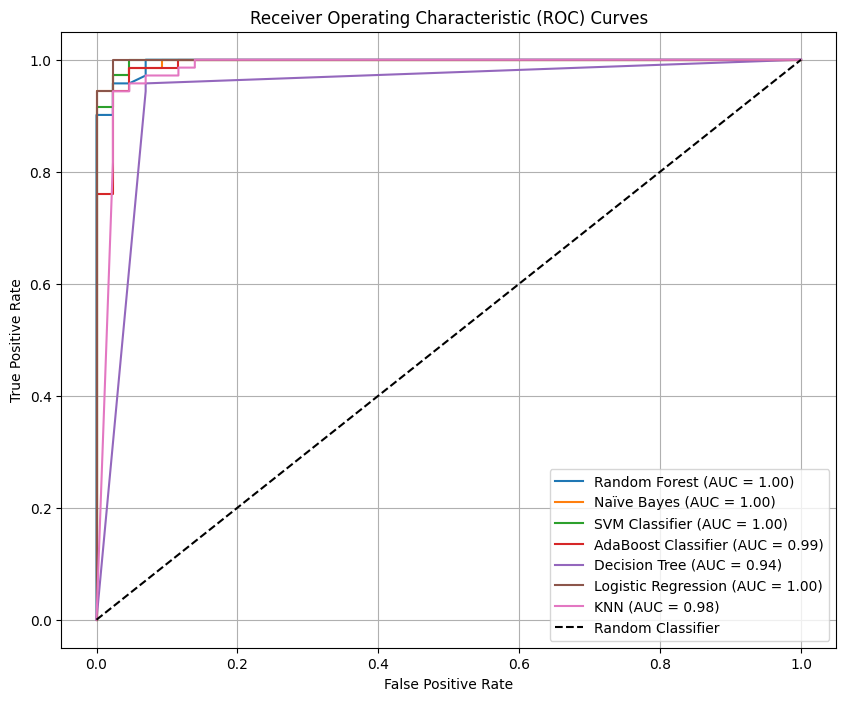

In [ ]:
# Tracer les courbes ROC pour les modèles qui supportent predict_proba/decision_function
plt.figure(figsize=(10, 8))

for name, estimator in best_estimators.items():
    if name in roc_auc_scores and roc_auc_scores[name] is not None:
        try:
            if hasattr(estimator, "predict_proba"):
                 y_probs = estimator.predict_proba(X_test)[:, 1]
            elif hasattr(estimator, "decision_function"):
                 y_probs = estimator.decision_function(X_test)
            else:
                 continue # Skip if neither is available

            fpr, tpr, thresholds = roc_curve(y_test, y_probs)
            auc_score = roc_auc_score(y_test, y_probs) # Recalculer AUC pour la légende
            plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
        except Exception as e:
             print(f"Error plotting ROC curve for {name}: {e}")
             continue


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


             Confusion Matrices (after GridSearchCV)

--- Random Forest ---


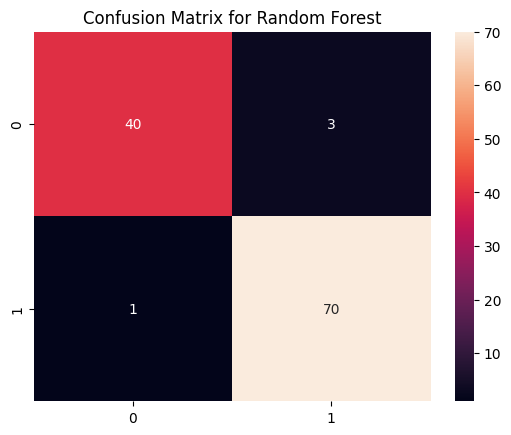

[[40  3]
 [ 1 70]]

--- Naïve Bayes ---


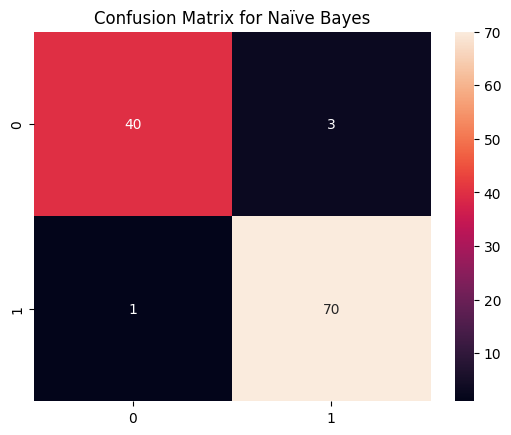

[[40  3]
 [ 1 70]]

--- SVM Classifier ---


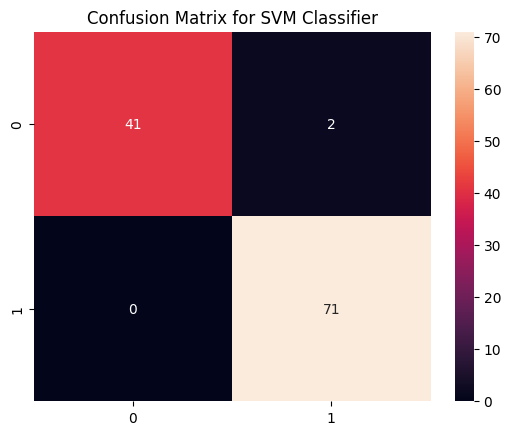

[[41  2]
 [ 0 71]]

--- AdaBoost Classifier ---


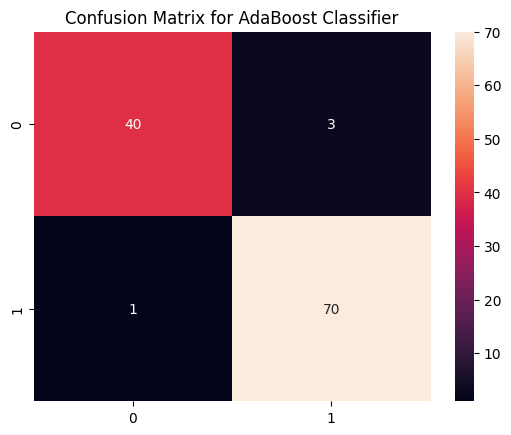

[[40  3]
 [ 1 70]]

--- Decision Tree ---


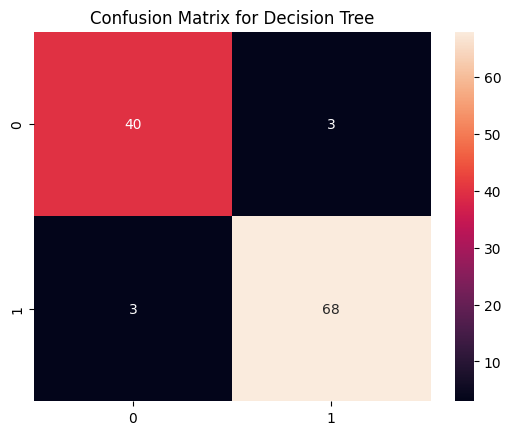

[[40  3]
 [ 3 68]]

--- Logistic Regression ---


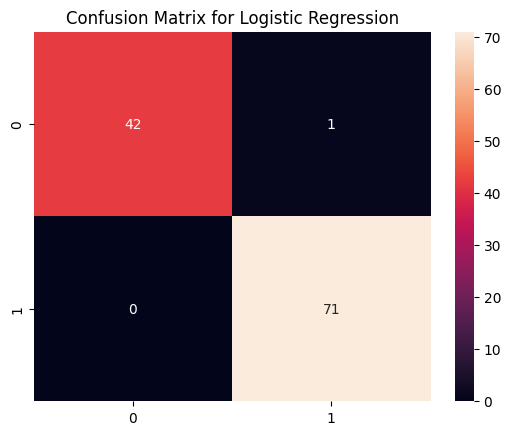

[[42  1]
 [ 0 71]]

--- KNN ---


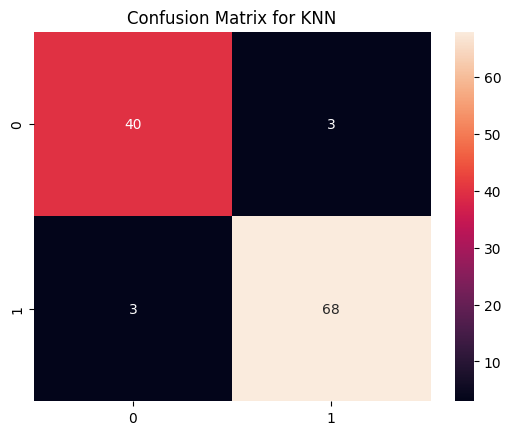

[[40  3]
 [ 3 68]]


In [ ]:
print("\n=================================================")
print("             Confusion Matrices (after GridSearchCV)")
print("=================================================")
#
for algo_name, cm in confusion_matrices.items():
     print(f"\n--- {algo_name} ---")
     sns.heatmap(cm, annot=True, fmt='d')
     plt.title(f"Confusion Matrix for {algo_name}")
     plt.show()
     print(cm) # Afficher la matrice sous forme de tableau

print("=================================================")

# Les Features Importants dans la dataset


--- Feature Importances from Best Random Forest Model ---
                    feature  importance
23               worst area    0.128549
27     worst concave points    0.128343
22          worst perimeter    0.127079
7       mean concave points    0.119801
20             worst radius    0.069273
6            mean concavity    0.055773
0               mean radius    0.050439
3                 mean area    0.042542
26          worst concavity    0.040747
2            mean perimeter    0.038349
13               area error    0.023545
21            worst texture    0.020966
25        worst compactness    0.017708
10             radius error    0.016454
5          mean compactness    0.014870
1              mean texture    0.014745
24         worst smoothness    0.013011
16          concavity error    0.009897
28           worst symmetry    0.009794
4           mean smoothness    0.008533
12          perimeter error    0.007931
19  fractal dimension error    0.006241
29  worst fractal dim

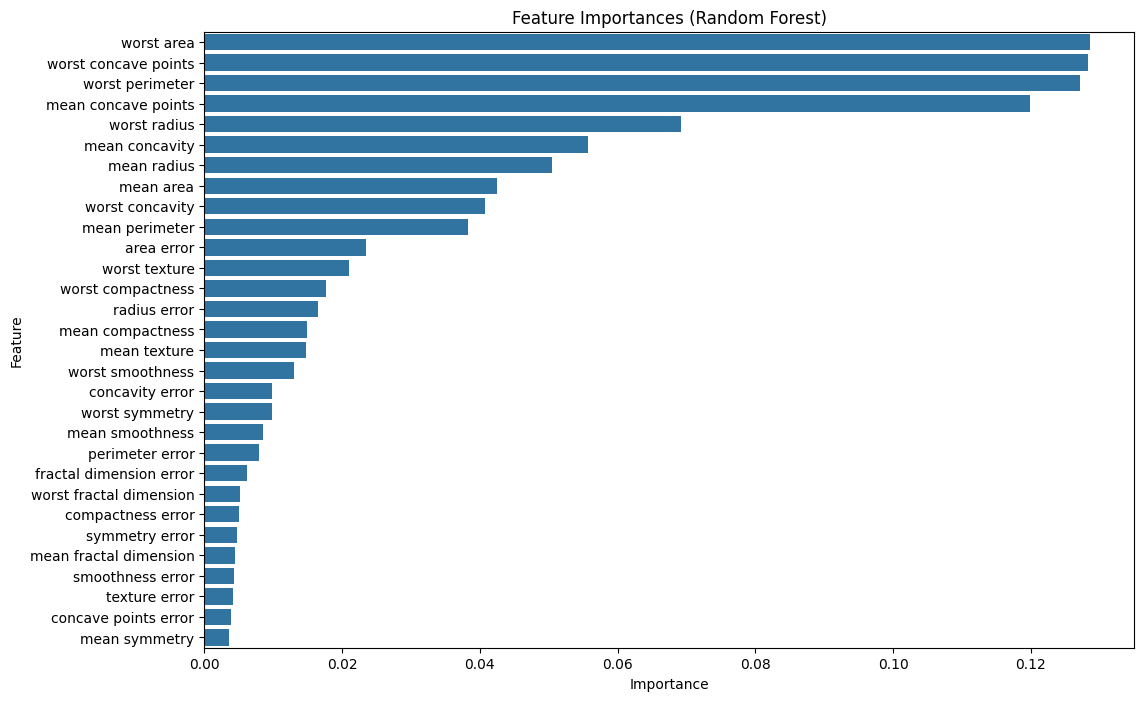

In [ ]:
best_rf_estimator = best_estimators.get('Random Forest')


if best_rf_estimator is not None:
  importances = best_rf_estimator.feature_importances_
  feature_names = data.feature_names

  # Create a DataFrame for better visualization
  feature_importance_df = pd.DataFrame({
      'feature': feature_names,
      'importance': importances
  })

  # Sort by importance in descending order
  feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

  print("\n--- Feature Importances from Best Random Forest Model ---")
  print(feature_importance_df)

  # Optional: Visualize the feature importances
  plt.figure(figsize=(12, 8))
  sns.barplot(x='importance', y='feature', data=feature_importance_df)
  plt.title('Feature Importances (Random Forest)')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()
else:
  print("\nRandom Forest estimator not found in best_estimators.")


# Code d'utilisateur

In [ ]:
from ipywidgets import FloatText, VBox, Button, Label
from IPython.display import display
import numpy as np

important_features = ['worst area', 'worst concave points', 'worst perimeter', 'mean concave points']
feature_inputs = {}
for feature in important_features:
    feature_inputs[feature] = FloatText(description=feature + ':')

output_label = Label(value="")

def predict_cancer_type(b):
    # Get user input values
    user_input_values = {}
    for feature in important_features:
        user_input_values[feature] = feature_inputs[feature].value

    feature_indices = [list(data.feature_names).index(f) for f in important_features]

    # Create a zero-filled array for a single sample (30 features)
    single_sample = np.zeros(len(data.feature_names))

    # Fill in the values for the important features
    for i, feature_name in enumerate(important_features):
        original_index = list(data.feature_names).index(feature_name)
        single_sample[original_index] = user_input_values[feature_name]


    # Scale the single sample using the same scaler fitted on the training data
    single_sample_scaled = scaler.transform([single_sample]) # transform expects a 2D array

    best_model_name = 'Random Forest'

    best_model = best_estimators.get(best_model_name)

    if best_model is None:
        output_label.value = "Error: Best model not found."
        return

    prediction = best_model.predict(single_sample_scaled)

    # Decode the prediction (0 for benign, 1 for malignant)
    predicted_class = le.inverse_transform(prediction)

    # Display the result
    if predicted_class[0] == 0:
        output_label.value = f"Prediction ({best_model_name}): Benign"
    else:
        output_label.value = f"Prediction ({best_model_name}): Malignant"


# Create the button
predict_button = Button(description="Predict")
predict_button.on_click(predict_cancer_type)

# Arrange the inputs and button
input_widgets = [feature_inputs[feature] for feature in important_features]
display(VBox(input_widgets + [predict_button, output_label]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
